*This notebook is modified by Hao Yan from original source: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# Naive Bayes Classification

The previous four sections have given a general overview of the concepts of machine learning.
In this section and the ones that follow, we will be taking a closer look at several specific algorithms for supervised and unsupervised learning, starting here with naive Bayes classification.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

Gaussian Naive Bayes  has shown in another notebook. This notebook shows how to apply Multinomial Naive Bayes for Text Classification

In [149]:
conda install seaborn

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done
Solving environment: - 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda





# All requested packages already installed.




Note: you may need to restart the kernel to use updated packages.


## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [171]:
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
import lime

In [173]:
import pandas as pd
import numpy as np
from collections import Counter
pd.options.display.max_colwidth = 200
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
%matplotlib inline
def update_dict(old_dict, new_dict):
    for key in new_dict:
        old_dict[key]=old_dict.get(key, 0) + new_dict[key]

In [174]:
from collections import Counter

data3 = pd.read_csv('incident_gas_distribution_jan2010_present.csv', encoding = "ISO-8859-1")


cause_count = {}
update_dict(cause_count, Counter(data3['CAUSE']))

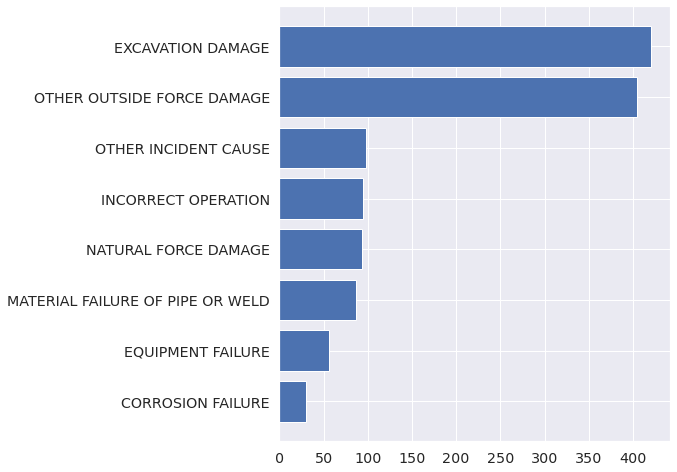

In [175]:


plt.figure(figsize=(7,8))
cause_count = {k: v for k, v in sorted(cause_count.items(), key=lambda item: item[1])}
leng = 10
plt.barh(range(len(cause_count))[-leng:], list(cause_count.values())[-leng:], align='center')
plt.yticks(range(len(cause_count))[-leng:], list(cause_count.keys())[-leng:])
plt.show()

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1.3)
# chart = sns.displot(y)
# chart.set_xticklabels(rotation=65, horizontalalignment='right')


In [177]:
data3.dropna(subset = ["NARRATIVE"], inplace=True)
data3.dropna(subset = ["CAUSE"], inplace=True)

data3.reset_index(inplace= True)

In [178]:
data3['NARRATIVE'] = data3['NARRATIVE'].apply(lambda x: x.lower())

In [180]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data3['msg_tokenied']= data3['NARRATIVE'] .apply(lambda x: tokenization(x))


In [181]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
data3['no_stopwords']= data3['msg_tokenied'].apply(lambda x:remove_stopwords(x))


['gas crew was installing a new 3/4 inch pe service line with a plastic bolt on service tee on a 4" pe main. the service line being installed with an efv was connected to the service tee at the main. the tap cutter on the service tee was screwed clockwise to tap into the main to provide gas to the new customer. after tap was completed and the gas had been introduced into the service line for approximately 30 minutes, the tap side of the efv, the fitting (nut that fastens the efv to the tap) blew off. the employee that was injured jumped into the hole and attempted to screw the tap cutter back down into the main to stop gas flow. while turning the tap, approximately 2 rounds, the gas ignited.  the individual jumped out of the hole and a crew member went to a close by main line valve to turn off the gas feeding the damaged service line. this main line valve shut off gas downstream of the closed valve. there was a water service located in the same excavation that melted and the water exti

In [184]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
data3['msg_stemmed']=data3['no_stopwords'].apply(lambda x: stemming(x))

In [186]:
X=data3['msg_stemmed'].tolist()
y=data3['CAUSE'].tolist()




In [187]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data3.CAUSE)
data3['categorical_label'] = le.transform(data3.CAUSE)

In [188]:
le.classes_

array(['CORROSION FAILURE', 'EQUIPMENT FAILURE', 'EXCAVATION DAMAGE',
       'INCORRECT OPERATION', 'MATERIAL FAILURE OF PIPE OR WELD',
       'NATURAL FORCE DAMAGE', 'OTHER INCIDENT CAUSE',
       'OTHER OUTSIDE FORCE DAMAGE'], dtype=object)

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [189]:
#categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] # Use only these five classes
from sklearn.model_selection import train_test_split
X=np.array(data3.NARRATIVE).tolist()
y=np.array(data3.categorical_label).tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)











Here is a representative entry from the data:

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline



### 2-step approach: First, pre-process then fit

## Approach 1: Preprocessing and Prediction in Two step

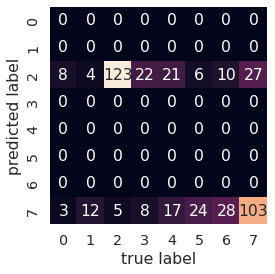

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Approach 2: Pipeline

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

steps = [('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier(class_weight='balanced'))]
model = Pipeline(steps)



In [193]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'rf__n_estimators': n_estimators,
    'rf__max_features': max_features,
    'rf__max_depth': max_depth,
    'rf__min_samples_split': min_samples_split,
    'rf__min_samples_leaf': min_samples_leaf,
    'rf__bootstrap': bootstrap
}

rf_random = RandomizedSearchCV(estimator=model,
                               param_distributions=random_grid,
                               n_iter=500,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [194]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


from lime.lime_text import LimeTextExplainer
from lime import lime_text
class_names = le.classes_
explainer = LimeTextExplainer(class_names=class_names)
explainer.

In [197]:
from lime.lime_text import LimeTextExplainer
from lime import lime_text
class_names = le.classes_
explainer = LimeTextExplainer(class_names=class_names)
for i in range(len(X_test)):
    exp = explainer.explain_instance(X_test[i], 
                                     rf_random.best_estimator_.predict_proba, 
                                     num_features=10,top_labels=1)

    # print('Document id: %d' % idx)
    # print('Probability(christian) = {:.3f}'.format(p1.predict_proba([newsgroups_test.data[idx]])[0,1]))
    # print('True class: %s' % class_names[newsgroups_test.target[idx]])
    # print('R2 score: {:.3f}'.format(exp.score))
    # exp.show_in_notebook(text=True)
    exp.save_to_file('html/lime_{}_{}.html'.format(i,class_names[y_test[i]]))


'WHILE STOPPING THE DEAD END OF A PIPELINE FOR SCHEDULED WORK, TDW SHORTSTOPP II PLUGGING SYSTEM FAILED, CAUSING A RELEASE OF GAS. THERE WERE NO INJURIES, FATALITIES, OR PROPERTY DAMAGE AS A RESULT OF THE RELEASE OF GAS. THE FIRE DEPARTMENT EVACUATED APPROXIMATELY 900 RESIDENTS ON A VOLUNTARY BASIS. I WILL BE PROVIDING UPDATES EVERY 30 DAYS.     6/12/2020 UPDATE:  AT THIS TIME, THE INVESTIGATION INTO THIS INCIDENT IS STILL ONGOING. I WILL PROVIDE AN UPDATE IN 30 DAYS OR ONCE ALL THE FACTS ARE KNOWN, WHICHEVER COMES FIRST.      7/13/2020 UPDATE:  AT THIS TIME, THE INVESTIGATION INTO THIS INCIDENT IS STILL ONGOING. WE ARE EXPECTING INITIAL RESULTS FROM A 3RD PARTY TESTING FACILITY WITHIN THE NEXT 14 DAYS. I WILL PROVIDE AN UPDATE IN 30 DAYS OR ONCE ALL THE FACTS ARE KNOWN, WHICHEVER COMES FIRST.     8/13/2020 UPDATE:   AT THIS TIME, WE HAVE RECEIVED RESULTS FROM A 3RD PARTY VENDOR AND ARE IN THE FINAL STAGES OF THE INVESTIGATION.  I WILL PROVIDE AN UPDATE IN 30 DAYS OR ONCE ALL THE FACTS

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

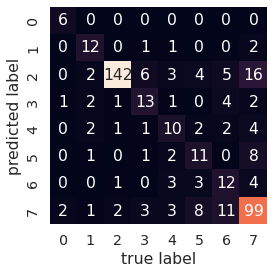

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [198]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)


In [196]:
print(report)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.70      0.70      0.70        20
           2       0.85      0.97      0.90       131
           3       0.59      0.63      0.61        35
           4       0.47      0.44      0.45        32
           5       0.33      0.38      0.35        24
           6       0.39      0.30      0.34        30
           7       0.81      0.74      0.78       136

    accuracy                           0.72       421
   macro avg       0.61      0.59      0.59       421
weighted avg       0.71      0.72      0.71       421



2

In [82]:
class_names[y_test[15]]

'EXCAVATION DAMAGE'

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [36]:
def predict_category(s, train= [X_train,y_train], model=model):
    pred = model.predict([s])
    return y_train[pred[0]]

Let's try it out:

In [42]:
predict_category('ON SEPTEMBER 6, 2021, AT APPROX. 8:20 A.M., AN EXPLOSION OCCURRED AT A RESIDENTIAL PROPERTY AT 2366 EDWIN AVE, AKRON, OHIO.  ONE ADULT INDIVIDUAL WAS INSIDE THE STRUCTURE AT THE TIME OF THE INCIDENT AND SUBSEQUENTLY HOSPITALIZED.  THE INCIDENT SEVERELY DAMAGED THE STRUCTURE AT 2366 EDWIN AVE, AND A NEIGHBORING STRUCTURE (2370 EDWIN AVE) ALSO SUSTAINED DAMAGES.    ON SEPTEMBER 6, 2021, AT APPROX. 8:31 A.M., DOMINION ENERGY OHIO (DEO) RECEIVED A CALL FROM THE AKRON FIRE DEPARTMENT (AFD) REPORTING THE INCIDENT.  DEO FIRST RESPONDER ARRIVED AT APPROX. 8:48 A.M., AND AFD ALREADY HAD SHUT OFF THE FLOW OF GAS AT THE METER VALVE.  DEO FIRST RESPONDER CLOSED THE SERVICE LINE CURB VALVE AT 2366 EDWIN AVE AT APPROX. 8:56 A.M.    DEO BAR-HOLED AND PERFORMED LEAK DETECTION ALONG THE MAIN ON EDWIN AVE, ALONG THE CUSTOMER SERVICE LINES AND AROUND THE PERIMETERS OF THE STRUCTURES AT 2370, 2366, AND 2360 EDWIN AVE, AND IN NEARBY MANHOLES AND DRAINS, AND 0% READINGS WERE FOUND.  DEO LEAK SURVEYED ALONG MULTIPLE NEIGHBORING STREETS, AND NO LEAKS WERE DETECTED.  DEO PERFORMED ODORANT TESTING AT 2827 EDWIN AVE, AND THE ODORANT WAS READILY DETECTIBLE AT 0.68%.    ON SEPTEMBER 6, 2021, AFTER REMOVING THE GAS METER AND A SMALL SECTION OF PIPING WITH THE METER SHUTOFF VALVE FROM THE BASEMENT AT 2366 EDWIN AVE, DEO PRESSURE TESTED THE SERVICE LINE PIPING AT 2366 EDWIN AVE AT 7 OZ (OPERATING PRESSURE FOR THE LP SYSTEM) FOR 10 MINUTES.  NO PRESSURE DROP WAS OBSERVED.  THE GAS METER AND SECTION OF PIPING SECTION WITH THE METER SHUTOFF VALVE ARE BEING PRESERVED BY DEO FOR FUTURE LABORATORY INSPECTION AND TESTING.    ON SEPTEMBER 30, 2021, REPRESENTATIVES FROM DEO, PUCO, AND OTHER INTERESTED PARTIES PARTICIPATED IN A SITE EXAMINATION AT 2366 EDWIN AVE.  LEAK TESTING WAS CONDUCTED ON THE HOUSE LINES AND GAS APPLIANCES (FURNACE, WATER HEATER, STOVE/RANGE, DRYER, AND POSSIBLE PORCH HEATER), AND SECTIONS OF HOUSE LINE PIPING AND THE FURNACE COVER ARE BEING PRESERVED BY THE INSURER OF 2366 EDWIN AVE FOR FUTURE LABORATORY INSPECTION AND TESTING.     DEO INVESTIGATION IS ONGOING, AND SEVERAL ITEMS REMAIN UNKNOWN AT THIS TIME.  ALL FIGURES IN THIS REPORT SHOULD BE READ AS ESTIMATES.  AS REQUIRED, SUPPLEMENTAL NOTIFICATIONS WILL BE PROVIDED, AS APPROPRIATE, UNTIL A CONCLUSION ON THE CAUSE OF THE INCIDENT IS ASCERTAINED.')

1

In [79]:
predict_category(X_test[1])

3

In [80]:
y_test[1]

3

In [82]:
X_test[1]

"DURING A ROUTINE ANNUAL INSPECTION OF DISTRICT REGULATOR STATION LS-260, PEOPLES EMPLOYEES NEEDED TO ISOLATE THE REGULATOR FROM THE SYSTEM IN ORDER TO INSPECT IT.  IN ORDER TO ISOLATE THAT REGULATOR, THE STATION BY-PASS NEEDS TO BE MANUALLY OPERATED TO MAINTAIN OUTLET PRESSURE.   THE EMPLOYEES PLACED A GAUGE ON THE RELIEF VALVE PIPING, WHICH WAS UPSTREAM AND NOW ISOLATED FROM THE OUTLET/DOWNSTREAM PIPING.   WHILE MANUALLY OPERATING THE STATION'S BY-PASS THEY WERE UNABLE TO MONITOR THE OUTLET PRESSURE, RESULTING IN AN OVER PRESSURIZATION OF THE DOWNSTREAM SYSTEM IN THE TOWN OF ROBINSON, PA.    SUPPLEMENTAL QUESTION ASKED BY NRC:  WERE THE EMPLOYEES INVOLVED WITH THIS INCIDENT RE-QUALIFIED ON THE TASKS THAT LED TO THE OVER PRESSURIZATION?    ON APRIL 29, 2020, THERE WERE THREE EMPLOYEES ON SITE PERFORMING THE ANNUAL INSPECTION OF DISTRICT REGULATOR STATION LS-260, ROBINSON, PA WHEN THE OVER PRESSURIZATION OCCURRED.  ALL THREE INDIVIDUALS WERE RE-QUALIFIED ON JUNE 23, 2020 ON THE TASKS T